# <span style="color: #5e60cc">Elements of AI</span> 🧩

## <span style="color: #5e60cc">Demo session 1:</span> <span style="color: #9798c4">Image classification</span> 📸

### <span style="color: #9798c4">Logistic regression | Multilayer Perceptron | Convolutional Neural Networks</span>

**Welcome to the first Elements of AI demo session!**

This week we will look into an image classification task on the MNIST data, using a Logistic Regression classifier, a Multilayer Perceptron and a Convolutional Neural Network.

### <span style="color: #9798c4">First steps</span>
First, make sure you are using [TensorFlow](https://www.tensorflow.org/) (version ≥ 2.0 required) with the [Keras API](https://www.tensorflow.org/guide/keras/overview). Let's make the necessary imports.

In [106]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model, to_categorical

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Tensorflow version: {}, and Keras version: {}.'.format(tf.__version__, tf.keras.__version__))

Using Tensorflow version: 2.3.0, and Keras version: 2.4.0.



---

### <span style="color: #9798c4">The MNIST data</span>
Let's start by loading the MNIST dataset, this may take a few seconds. Next, we split the data in training and validation test for the purposes of our analysis.

In [107]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


-----

The MNIST data consists of 70k images of handwritten digits with size 28x28 pixels which work as the feature matrices `X_train` and `X_test`. The data also includes the labels `y_train` and `y_test`, which are vectors that contain the correct classes for each handwritten digit, for instance `'0', '1', ..., '9'`. The split creates a training sample of 60k images and a validation set of 10k images.

The handwritten digits are in the range of `'0', '1', ..., '9'`, therefore this is a [multi-class classification](https://en.wikipedia.org/wiki/Multiclass_classification) task with 10 possible class labels.

In [108]:
num_of_classes = 10

Next, let's turn the images into grayscale.

In [109]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Let's check now the shapes of our data:

In [110]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)



----

We have 60k images with size 28x28 pixels in the `X_train`, 10k images of size 28x28 pixels in `X_test`. The `y_train` and `y_test` vectors include the labels for 60k and 10k sample images respectively. These labels take values in the range `'0', '1', ..., '9'`.

### <span style="color: #9798c4">Logistic regression</span>
Let's start by training a [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) classifier. Python's [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) library is particularly useful with this family of models. First we need to flatten the input images, so we use the `reshape` function, and each image of the 60k has 28x28=784 pixels.

In [111]:
X_train_lr = X_train.reshape((60000, 784))
X_test_lr = X_test.reshape((10000, 784))

print('X_train_lr shape: ', X_train_lr.shape)
print('X_test_lr shape: ', X_test_lr.shape)

X_train_lr shape:  (60000, 784)
X_test_lr shape:  (10000, 784)



---

Let's now go ahead and fit the logistic regression classifier. Since we're training with 60k images, it might take a few seconds:

In [112]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000, multi_class='multinomial')
lr = model.fit(X_train_lr, y_train)

In order to obtain the predicted values on the validation set, we can do:

In [113]:
y_pred = lr.predict(X_test_lr)

print('First ten true labels:      ', y_test[:10])
print('First ten predicted labels: ', y_pred[:10])

First ten true labels:       [7 2 1 0 4 1 4 9 5 9]
First ten predicted labels:  [7 2 1 0 4 1 4 9 6 9]


We can already tell empirically, that out of the first 10 samples, only one, the 9th sample is misclassified as a '6', while its true class is '5'. 

Let's evaluate the performance of the model in a more reliable manner, by comparing the predicted labels to the true labels using the [accuracy evaluation metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), i.e. how often does the classifier correctly classify each digit?

In [114]:
from sklearn.metrics import accuracy_score

score_lr = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy:', score_lr)

Logistic regression accuracy: 0.9256


A perfect accuracy score is '1', which means that all the predicted labels match the true labels of the images. This means that apparently our logistic regression classifier, seems to perform rather well on the MNIST data. We can go one step further, and visualize some of the **misclassified** sample images along with their predicted and true labels.

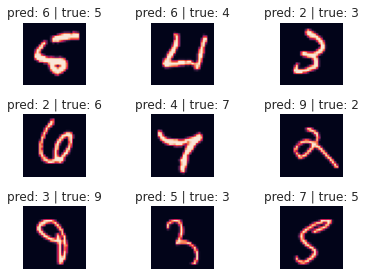

In [115]:
fig = plt.figure(9)
k = 331 #hardcoded subplot code to generate 3x3 subplots using the loop

for i in range(0, len(y_test)):
    if(y_test[i] != y_pred[i]):
        im = X_test_lr[i].reshape((28,28))
        ax = plt.subplot(k)
        ax.set_axis_off()
        ax.title.set_text("pred: " + str(y_pred[i]) + " | true: " + str(y_test[i]))
        plt.imshow(im)

        k+=1
        if(k>339):# again hardcoded so it breaks after we have e.g. 9 samples to show
            break

plt.tight_layout()
plt.show()

Take a moment to examine the images yourself. Would you have done better than the classifier in all these cases?


---

### <span style="color: #9798c4">Multilayer Perceptron (MLP)</span>
Next, let's try a deeper solution - a [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) classifier. 

First, we will need to do a [one-hot](https://en.wikipedia.org/wiki/One-hot) encoding of the label vectors `y_train` and `y_test`.

In [116]:
y_train = to_categorical(y_train, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)

print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


Let's take a look at the shape of the vectors now. The `y_train` vector after the one-hot enocoding includes 60k labels with 10 columns, one for each class. The class to which the digit belongs to contains a 1, while the rest of the columns are marked with zeros. Finally, the `y_test` vector contains 10k one-hot encoded values.


---

Let's initialize the MLP model. We can start by creating an `Input layer` with shape `28x28`, matching the size of the input images. Then, let's use a `Flatten layer`, which will convert the images into vectors with length 784, just like we did in the logistic regression classifier.

In [117]:
inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)

Next, let's add two `Dense layers` (or fully connected layers). A [fully connected layer](https://keras.io/api/layers/core_layers/dense/) connects all input nodes to all output nodes while learning some weight for each connection. We create the `Dense layers` with 20 output nodes and a [ReLU activation function](https://keras.io/api/layers/activations/). 

In [118]:
x = layers.Dense(units=20, activation="relu")(x)
x = layers.Dense(units=20, activation="relu")(x)

Then, let's define the output layer. The 10 output nodes stand for the 10 classes in our multiclass classification problem, and the [softmax activation](https://keras.io/api/layers/activations/) is used so that a 10-dimensional vector is returned, which contains the probability distribution of the predicted labels over the 10 digit classes.

In [119]:
outputs = layers.Dense(units=10, activation='softmax')(x)

Next, let's create a model instance using the desired input and output.

In [120]:
model = keras.Model(inputs=inputs, outputs=outputs, name='MLP')

Finally, we can compile the model by specifying a loss function, optimizer and a performance evaluation metric. Based on the learning task, we can choose the [categorical crossentropy](https://keras.io/api/losses/) loss function, start with an [adam](https://keras.io/api/optimizers/adam/) optimizer and use accuracy again as the performance evaluation metric.

In [121]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(model.summary())

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
None



---

We can also plot the architecture of our MLP model:

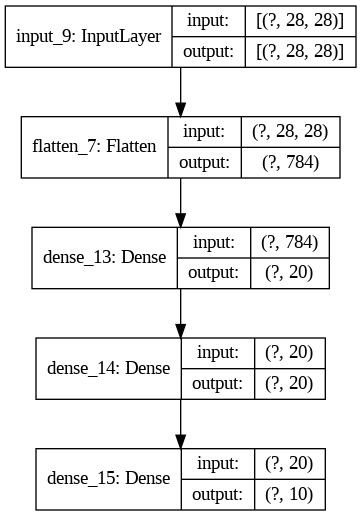

In [122]:
plot_model(model, show_shapes=True)

Now let's fit our model on the MNIST data. We start by specifying the number of epochs; each epoch stands for the number of passes over the whole training data. Let's start with 10 epochs and a batch size of 32 training images.

In [123]:
%%time
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32,
                    verbose=2)

Epoch 1/10
1875/1875 - 4s - loss: 0.4132 - accuracy: 0.8829
Epoch 2/10
1875/1875 - 4s - loss: 0.2218 - accuracy: 0.9357
Epoch 3/10
1875/1875 - 4s - loss: 0.1854 - accuracy: 0.9459
Epoch 4/10
1875/1875 - 4s - loss: 0.1627 - accuracy: 0.9518
Epoch 5/10
1875/1875 - 4s - loss: 0.1486 - accuracy: 0.9559
Epoch 6/10
1875/1875 - 4s - loss: 0.1367 - accuracy: 0.9591
Epoch 7/10
1875/1875 - 4s - loss: 0.1284 - accuracy: 0.9618
Epoch 8/10
1875/1875 - 4s - loss: 0.1199 - accuracy: 0.9642
Epoch 9/10
1875/1875 - 3s - loss: 0.1137 - accuracy: 0.9659
Epoch 10/10
1875/1875 - 3s - loss: 0.1067 - accuracy: 0.9680
CPU times: user 54.1 s, sys: 21.3 s, total: 1min 15s
Wall time: 38.8 s


We can visualize the loss and the accuracy values over the number of epochs. A 'healthy' training shows a loss that reduces, while the training accuracy goes up over the passing of each epoch.

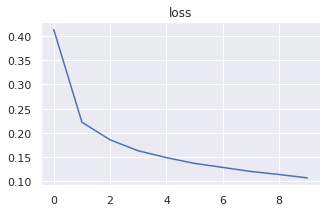

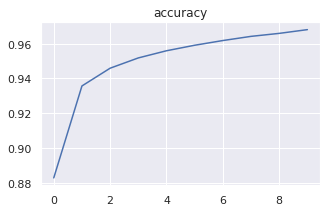

In [124]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

Let's check the performance accuracy for our MLP:

In [125]:
score_mlp = model.evaluate(X_test, y_test, verbose=2)
print()
print('Multilayer perceptron accuracy', round(score_mlp[1],4))
print('Logistic regression accuracy:', score_lr)

313/313 - 0s - loss: 0.1475 - accuracy: 0.9557

Multilayer perceptron accuracy 0.9557
Logistic regression accuracy: 0.9256


The MLP seems to be performing a little bit better than the logistic regression classifier.

---

### <span style="color: #9798c4">Convolutional Neural Networks (CNN)</span>
Finally, our last contestant, a [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network). We will use a `Conv2D` convolutional layer which performs the convolution operation on 2D matrices, a `MaxPooling2D` [pooling layer](https://keras.io/layers/pooling/) which reduces the dimension of the image and a `Flatten` layer which flattens the images to vectors. The output then is parsed through a `Dense` layer. Finally through the output layer (also a `Dense` layer) where the output is reduced to 10 units, and using a softmax activation we obtain a 10-dimensional vector with the probability distribution over the 10 candidate classes.

In [126]:
inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3),
                  padding='valid',
                  activation ='relu')(inputs)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.Flatten()(x)
x = layers.Dense(units=128, activation ='relu')(x)

outputs = layers.Dense(units=10,
                       activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs,
                    name="cnn")
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________


---

Note that from 16k parameters that we had using the MLP, we now have skyrocketed to 693k of parameters with the CNN. CNNs can be particularly complex models.

We can also plot the architecture of our CNN model:

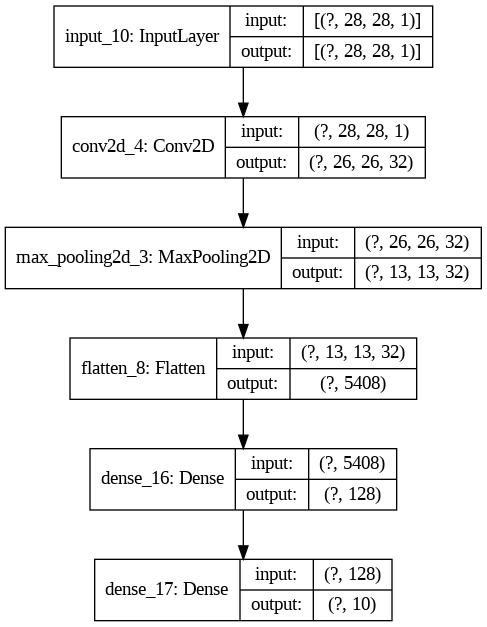

In [127]:
plot_model(model, show_shapes=True)

Let's fit our model using 5 epochs this time (each epoch can take a few seconds) and a batch size of 128. 

In [128]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    epochs=5, 
                    batch_size=128,
                    verbose=2)

Epoch 1/5
469/469 - 7s - loss: 0.2125 - accuracy: 0.9393
Epoch 2/5
469/469 - 7s - loss: 0.0633 - accuracy: 0.9813
Epoch 3/5
469/469 - 8s - loss: 0.0435 - accuracy: 0.9870
Epoch 4/5
469/469 - 7s - loss: 0.0314 - accuracy: 0.9906
Epoch 5/5
469/469 - 8s - loss: 0.0223 - accuracy: 0.9935
CPU times: user 3min 20s, sys: 7.09 s, total: 3min 27s
Wall time: 37.9 s


The accuracy in the training dataset reaches 0.993. Let's see how well the model performs on the validation data, to check for overfitting.

In [129]:
score_cnn = model.evaluate(X_test, y_test, verbose=2)
print()
print('Convolutional neural network accuracy:', round(score_cnn[1],4))
print('Multilayer perceptron accuracy:       ', round(score_mlp[1],4))
print('Logistic regression accuracy:         ', score_lr)

313/313 - 1s - loss: 0.0442 - accuracy: 0.9843

Convolutional neural network accuracy: 0.9843
Multilayer perceptron accuracy:        0.9557
Logistic regression accuracy:          0.9256
